In [1]:
from roofline_helper import *
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

Bash command for converting nsight compute reports to csv files:
```bash
ncu -i ncu_roofile_nvtx_nparticles_[# particles].ncu-rep -csv --page raw > output.csv
```

In [2]:
dir = os.getcwd()

In [3]:
profile_dir = os.path.join(dir, '../data/deltaAI/profiling')

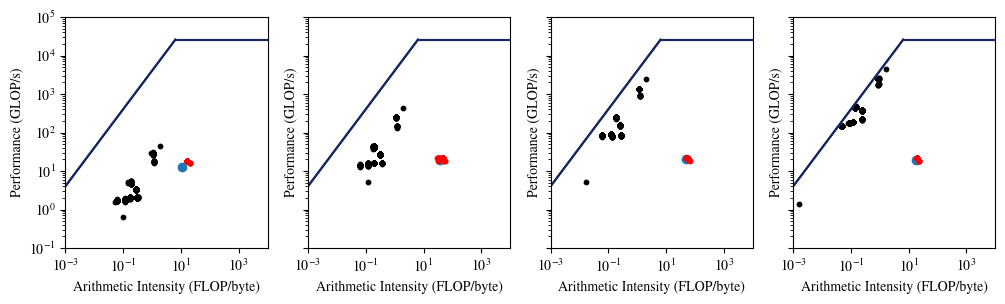

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

# black markers: Solver kernels
# red markers: TChem RHS kernel 

df = pd.read_csv(f'{profile_dir}/nparticles_1000/ncu_nparticles_1000.csv', )
arith_intensity_arr, performance_arr, kernel_names, timing_arr = calculateRooflineStats(df)
plotRoofline(arith_intensity_arr, performance_arr, kernel_names, timing_arr, ax=axs[0], xlim=(1e-3, 1e4), ylim=(1e-1, 1e5))
plotRoofline(arith_intensity_arr, performance_arr, kernel_names, ax=axs[0], xlim=(1e-3, 1e4), ylim=(1e-1, 1e5))

df = pd.read_csv(f'{profile_dir}/nparticles_10000/ncu_nparticles_10000.csv', )
arith_intensity_arr, performance_arr, kernel_names, timing_arr = calculateRooflineStats(df)
plotRoofline(arith_intensity_arr, performance_arr, kernel_names, timing_arr, ax=axs[1], xlim=(1e-3, 1e4), ylim=(1e-1, 1e5))
plotRoofline(arith_intensity_arr, performance_arr, kernel_names, ax=axs[1], xlim=(1e-3, 1e4), ylim=(1e-1, 1e5))

df = pd.read_csv(f'{profile_dir}/nparticles_100000/ncu_nparticles_100000.csv', )
arith_intensity_arr, performance_arr, kernel_names, timing_arr = calculateRooflineStats(df)
plotRoofline(arith_intensity_arr, performance_arr, kernel_names, timing_arr, ax=axs[2], xlim=(1e-3, 1e4), ylim=(1e-1, 1e5))
plotRoofline(arith_intensity_arr, performance_arr, kernel_names, ax=axs[2], xlim=(1e-3, 1e4), ylim=(1e-1, 1e5))

df = pd.read_csv(f'{profile_dir}/nparticles_1000000/ncu_nparticles_1000000.csv', )
arith_intensity_arr, performance_arr, kernel_names, timing_arr = calculateRooflineStats(df)
plotRoofline(arith_intensity_arr, performance_arr, kernel_names, timing_arr, ax=axs[3], xlim=(1e-3, 1e4), ylim=(1e-1, 1e5))
plotRoofline(arith_intensity_arr, performance_arr, kernel_names, ax=axs[3], xlim=(1e-3, 1e4), ylim=(1e-1, 1e5))

In [4]:
#n_particles = np.logspace(2, 6, 5).astype(int)
n_particles = np.logspace(1, 6, 6).astype(int)
datasets = {f'nparticles_{particle}': '' for particle in n_particles}

for subdirectory in datasets.keys():
    datasets[subdirectory] = pd.read_csv(f'{profile_dir}/{subdirectory}/ncu_{subdirectory}.csv', )

/var/folders/3p/g6j_y4hj63v0_klskdgcx7jm0000gr/T/ipykernel_2496/2985275078.py:6: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,278,279,281,282,284,285,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,327,328,339,340,341,342,343,344,349,350,351,352,353,354,355,356,357,359,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,393,394,396,397,399,400,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,

In [6]:
def formatLabel(label):
    n_particles = label.split('_')[1]
    return f'$N_p = {to_latex_sci(int(n_particles), precision=0)}$'

def to_latex_sci(val, precision=2):
    if val == 0:
        return f"${0:.{precision}f}$"
    exponent = int(f"{val:.{precision}e}".split('e')[1])
    base = val / (10 ** exponent)
    return f"10^{{{exponent}}}"

/var/folders/3p/g6j_y4hj63v0_klskdgcx7jm0000gr/T/ipykernel_2496/1689956895.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('PuBu')


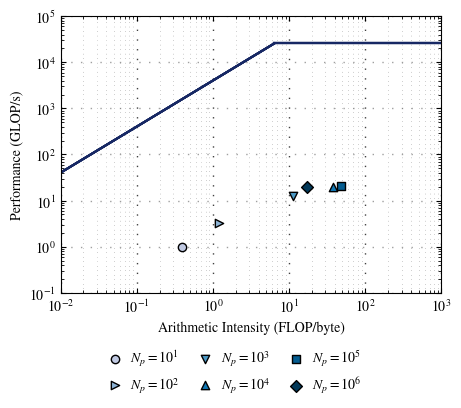

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4), sharey=True, layout='constrained')

cmap = cm.get_cmap('PuBu')

# Generate 10 evenly spaced values between 0 and 1
values = np.linspace(.3, 1, len(datasets))

# Convert RGBA to hex
hex_colors = [mcolors.to_hex(cmap(v)) for v in values]

markers = ['o', '>', 'v', '^', 's', 'D']

for i, (name, df) in enumerate(datasets.items()):
    arith_intensity_arr, performance_arr, kernel_names, timing_arr = calculateRooflineStats(df)
    plotRoofline(arith_intensity_arr, performance_arr, kernel_names, timing_arr, ax=ax, 
                 xlim=(1e-2, 1e3), ylim=(1e-1, 1e5), marker=markers[i], label=formatLabel(name), color=hex_colors[i], 
                 edgecolor='k', fontsize=10, zorder=10)
fig.legend(fontsize=10, ncol=3, loc='outside lower center', 
           frameon=False, handletextpad=.1, columnspacing=.9)
formatPlotGrid(ax, minor_lw=0.5)
plt.savefig('roofline-GMRES.pdf', format='pdf', bbox_inches='tight')